In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import cmath
from scipy import integrate

In [3]:
def numerov(f, psi0, dh):

    psi = np.zeros(len(f))
    psi[0] = (1/(np.pi)**0.5)*np.exp(-R[-1])
    psi[1] = (1/(np.pi)**0.5)*np.exp(-(R[-1]-dh))
    
    h2 = dh**2
    h12 = h2/12.

    w0=psi0*(1-h12*f[0])
    w1=psi[1]*(1-h12*f[1])
    xi = psi[1]
    fi = f[1]
    for i in range(2,len(f)):
        w2 = 2*w1-w0+h2*fi*xi  
        fi = f[i] 
        xi = w2/(1-h12*fi)
        psi[i]=xi
        w0 = w1
        w1 = w2
    return psi

In [4]:
def fhyd(En, l, R):
    return l*(l+1)/(R**2)-2/R-En

In [20]:
params = {'legend.fontsize': 18,
          'axes.labelsize': 18,
          'axes.titlesize': 18,
          'figure.titlesize': 22,
          'xtick.labelsize' :15,
          'ytick.labelsize': 15,
          'mathtext.fontset': 'custom',
          'mathtext.rm': 'Bitstream Vera Sans',
          'mathtext.it':'Bitstream Vera Sans:italic',
          'grid.color': 'k',
          'grid.linestyle': ':',
          'grid.linewidth': 0.5
         }
plt.rcParams.update(params)

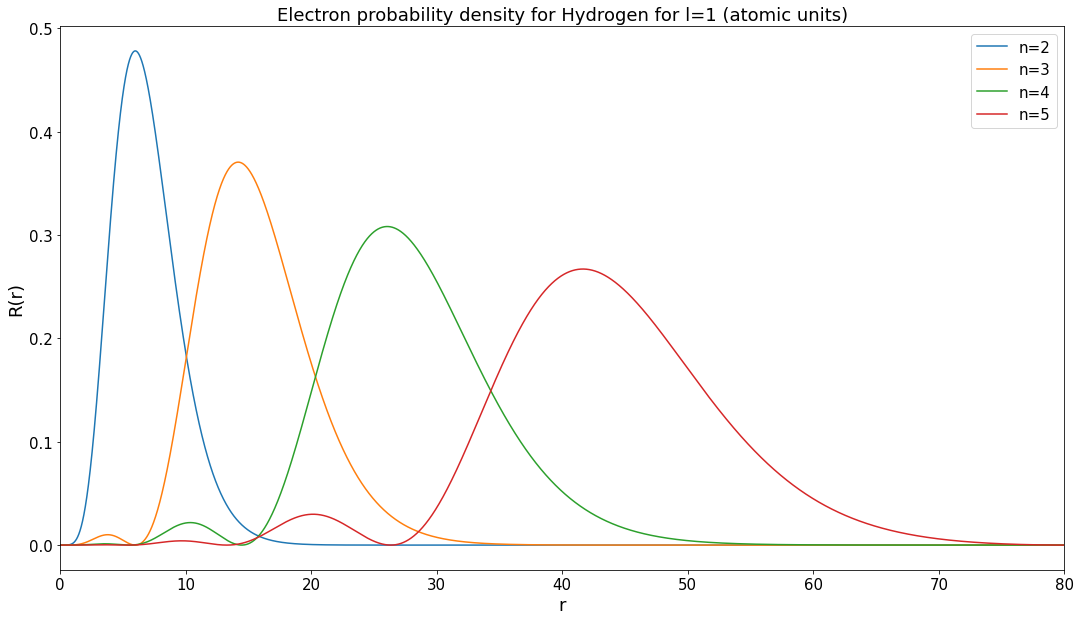

In [23]:

R = np.linspace(1e-7, 80, 10**6)
l=1

fig = plt.figure(figsize=(18,10))
plt.title(f"Electron probability density for Hydrogen for l={l} (atomic units)")
for n in range(2, 6):
    En=-1.0/(n**2)
    f = fhyd(En,l,R[::-1])
    psi = numerov(f,0,R[1]-R[0])[::-1]
    psi = (psi*R)**2
    norm = integrate.trapezoid(psi**2,x=R)
    psi = psi/np.sqrt(abs(norm))



    plt.plot(R, psi, label=f"n={n}")
    plt.xlabel("r")
    plt.xlim(0,80)
#    plt.ylim(-1,2)
    plt.ylabel("R(r)")
    plt.legend(prop={"size":15})

plt.show()

# fig2 = plt.figure(figsize=(18,10))

# psi1 = 2*np.exp(-R)
# psi2 = 2*(1/2)**1.5*(1-R/2)*np.exp(-R/2)
# psi3 = 2*(1/3)**1.5*(1-(2*R)/3+2*(R**2)/27)*np.exp(-R/3)

# plt.title(f"Actual Radial wavefunction of Hydrogen for l={l} - atomic units")
# plt.plot(R, psi1, label=f"n={1}")
# plt.plot(R, psi2, label=f"n={2}")
# plt.plot(R, psi3, label=f"n={3}")
# plt.xlabel("r")
# plt.xlim(0,30)
# plt.ylim(-1,2)
# plt.ylabel("R(r)")
# plt.legend(prop={"size":15})